In [1]:
# imports and PERSONAL constants
%matplotlib inline

import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d

RESULTS_DIR = "./results/"
EXP_BASE = "bernoulli_vae_mnist_h500_k1_z"
RESULTS_F = "results.csv"
dims = [3, 5, 10, 20, 200]

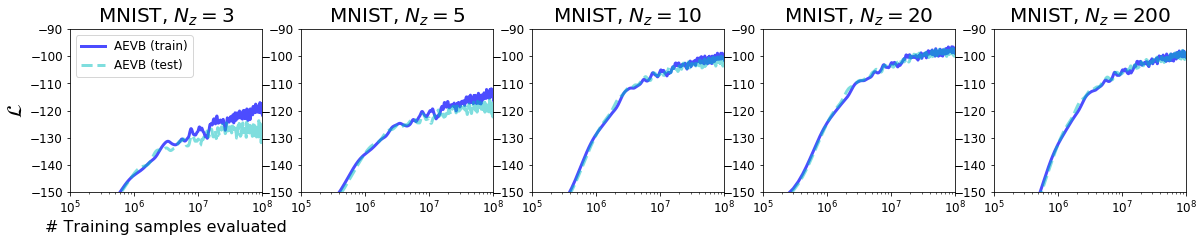

In [3]:
matplotlib.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(20,3))

for i, dim in enumerate(dims):
    res_f = os.path.join(RESULTS_DIR, EXP_BASE + str(dim), RESULTS_F)
    df = pd.read_csv(train)

    train_smoothed = gaussian_filter1d(df['ELBO'], sigma=5)
    test_smoothed = gaussian_filter1d(df['Test ELBO'], sigma=5)

    ax = fig.add_subplot(1, 5, i+1)
    ax.set_xscale("log")
    ax.set_xlim(left=10**5, right=10**8)
    ax.set_ylim(bottom=-150, top=-90)

    # raw_train_line, = ax.plot(tf['Samples'], df['ELBO'], color="b", label="raw")
    smooth_train_line, = ax.plot(df['Samples'], train_smoothed, linewidth=3, color='b', 
                                 label="AEVB (train)", alpha=0.7)
    # raw_test_line, = ax.plot(df['Samples'], df['Test ELBO'], color="g", label="raw")
    smooth_test_line, = ax.plot(df['Samples'], test_smoothed, linewidth=3, linestyle='--',
                                color='c', label="AEVB (test)", alpha=0.5)
    
    if i == 0:
        ax.set_xlabel('# Training samples evaluated', fontsize=16)
        ax.set_ylabel(r'$\mathcal{L}$', fontsize=20)
        plt.legend(loc="upper left")
        
    plt.title(r"MNIST, $N_z =$" + str(dim), fontsize=20)
plt.show()

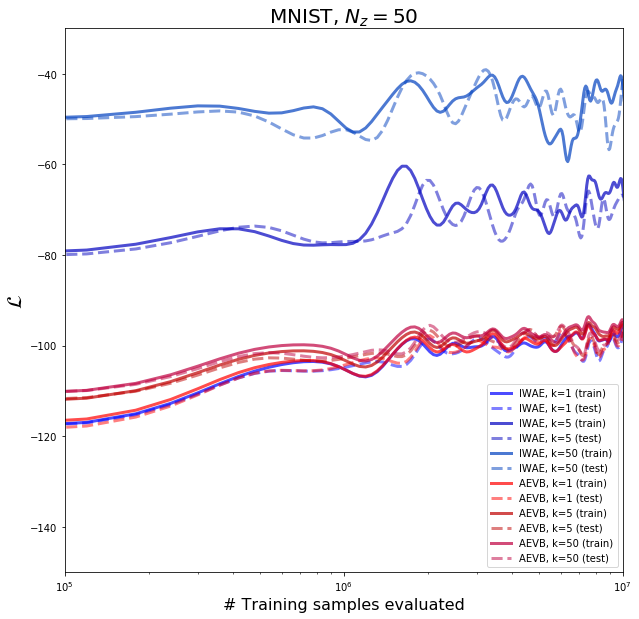

In [8]:
dim = 50
sigma = 3

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

df1 = pd.read_csv("./results/iwae_reproduction/bernoulli_iwae_mnist_k1_z50/results.csv")
df2 = pd.read_csv("./results/iwae_reproduction/bernoulli_iwae_mnist_k5_z50/results.csv")
df3 = pd.read_csv("./results/iwae_reproduction/bernoulli_iwae_mnist_k50_z50/results.csv")
df4 = pd.read_csv("./results/iwae_reproduction/bernoulli_vae_mnist_k1_z50/results.csv")
df5 = pd.read_csv("./results/iwae_reproduction/bernoulli_vae_mnist_k5_z50/results.csv")
df6 = pd.read_csv("./results/iwae_reproduction/bernoulli_vae_mnist_k50_z50/results.csv")

df1_train_smoothed = gaussian_filter1d(df1['ELBO'], sigma=sigma)
df1_test_smoothed = gaussian_filter1d(df1['Test ELBO'], sigma=sigma)
df2_train_smoothed = gaussian_filter1d(df2['ELBO'], sigma=sigma)
df2_test_smoothed = gaussian_filter1d(df2['Test ELBO'], sigma=sigma)
df3_train_smoothed = gaussian_filter1d(df3['ELBO'], sigma=sigma)
df3_test_smoothed = gaussian_filter1d(df3['Test ELBO'], sigma=sigma)
df4_train_smoothed = gaussian_filter1d(df4['ELBO'], sigma=sigma)
df4_test_smoothed = gaussian_filter1d(df4['Test ELBO'], sigma=sigma)
df5_train_smoothed = gaussian_filter1d(df5['ELBO'], sigma=sigma)
df5_test_smoothed = gaussian_filter1d(df5['Test ELBO'], sigma=sigma)
df6_train_smoothed = gaussian_filter1d(df6['ELBO'], sigma=sigma)
df6_test_smoothed = gaussian_filter1d(df6['Test ELBO'], sigma=sigma)

ax.set_xscale("log")
ax.set_xlim(left=10**5, right=10**7)
# ax.set_xlim(left=0, right=10**7)
ax.set_ylim(bottom=-150, top=-30)

df1_smooth_train_line, = ax.plot(df1['Samples'], df1_train_smoothed, linewidth=3, color=(0,0,1.), 
                             label="IWAE, k=1 (train)", alpha=0.7)
df1_smooth_test_line, = ax.plot(df1['Samples'], df1_test_smoothed, linewidth=3, linestyle='--',
                            color=(0,0,1.), label="IWAE, k=1 (test)", alpha=0.5)

df2_smooth_train_line, = ax.plot(df2['Samples'], df2_train_smoothed, linewidth=3, color=(0,0,.75), 
                             label="IWAE, k=5 (train)", alpha=0.7)
df2_smooth_test_line, = ax.plot(df2['Samples'], df2_test_smoothed, linewidth=3, linestyle='--',
                            color=(0,0,.75), label="IWAE, k=5 (test)", alpha=0.5)

df3_smooth_train_line, = ax.plot(df3['Samples'], df3_train_smoothed, linewidth=3, color=(0,.25,.75), 
                             label="IWAE, k=50 (train)", alpha=0.7)
df3_smooth_test_line, = ax.plot(df3['Samples'], df3_test_smoothed, linewidth=3, linestyle='--',
                            color=(0,.25,.75), label="IWAE, k=50 (test)", alpha=0.5)

df4_smooth_train_line, = ax.plot(df4['Samples'], df4_train_smoothed, linewidth=3, color=(1.,0,0), 
                             label="AEVB, k=1 (train)", alpha=0.7)
df4_smooth_test_line, = ax.plot(df4['Samples'], df4_test_smoothed, linewidth=3, linestyle='--',
                            color=(1.,0,0), label="AEVB, k=1 (test)", alpha=0.5)

df5_smooth_train_line, = ax.plot(df5['Samples'], df5_train_smoothed, linewidth=3, color=(.75,0,0), 
                             label="AEVB, k=5 (train)", alpha=0.7)
df5_smooth_test_line, = ax.plot(df5['Samples'], df5_test_smoothed, linewidth=3, linestyle='--',
                            color=(.75,0,0), label="AEVB, k=5 (test)", alpha=0.5)

df6_smooth_train_line, = ax.plot(df6['Samples'], df6_train_smoothed, linewidth=3, color=(.75,0,.25), 
                             label="AEVB, k=50 (train)", alpha=0.7)
df6_smooth_test_line, = ax.plot(df6['Samples'], df6_test_smoothed, linewidth=3, linestyle='--',
                            color=(.75,0,.25), label="AEVB, k=50 (test)", alpha=0.5)


ax.set_xlabel('# Training samples evaluated', fontsize=16)
ax.set_ylabel(r'$\mathcal{L}$', fontsize=20)
plt.legend(loc="lower right")

plt.title(r"MNIST, $N_z =$" + str(dim), fontsize=20)
plt.show()

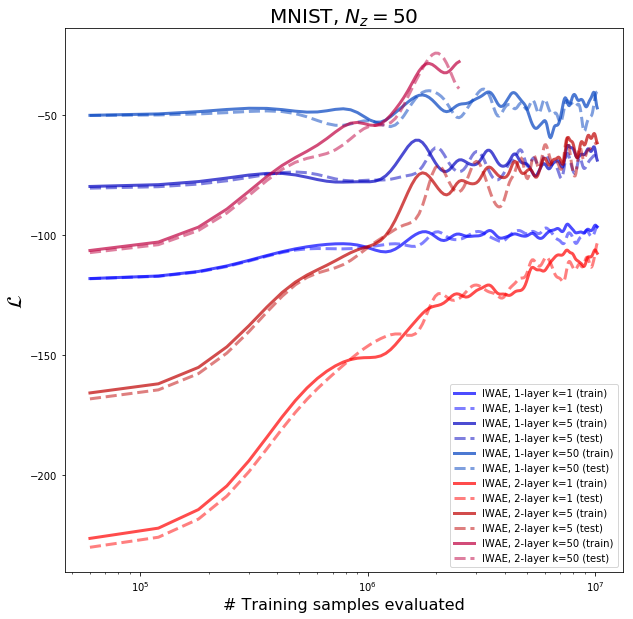

In [6]:
dim = 50
sigma = 3

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

df1 = pd.read_csv("./results/iwae_reproduction/bernoulli_iwae_mnist_k1_z50/results.csv")
df2 = pd.read_csv("./results/iwae_reproduction/bernoulli_iwae_mnist_k5_z50/results.csv")
df3 = pd.read_csv("./results/iwae_reproduction/bernoulli_iwae_mnist_k50_z50/results.csv")
df4 = pd.read_csv("./bernoulli_iwae_stoch2_mnist_k1/results.csv")
df5 = pd.read_csv("./bernoulli_iwae_stoch2_mnist_k5/results.csv")
df6 = pd.read_csv("./bernoulli_iwae_mnist_k50_z50/results.csv")

df1_train_smoothed = gaussian_filter1d(df1['ELBO'], sigma=sigma)
df1_test_smoothed = gaussian_filter1d(df1['Test ELBO'], sigma=sigma)
df2_train_smoothed = gaussian_filter1d(df2['ELBO'], sigma=sigma)
df2_test_smoothed = gaussian_filter1d(df2['Test ELBO'], sigma=sigma)
df3_train_smoothed = gaussian_filter1d(df3['ELBO'], sigma=sigma)
df3_test_smoothed = gaussian_filter1d(df3['Test ELBO'], sigma=sigma)
df4_train_smoothed = gaussian_filter1d(df4['ELBO'], sigma=sigma)
df4_test_smoothed = gaussian_filter1d(df4['Test ELBO'], sigma=sigma)
df5_train_smoothed = gaussian_filter1d(df5['ELBO'], sigma=sigma)
df5_test_smoothed = gaussian_filter1d(df5['Test ELBO'], sigma=sigma)
df6_train_smoothed = gaussian_filter1d(df6['ELBO'], sigma=sigma)
df6_test_smoothed = gaussian_filter1d(df6['Test ELBO'], sigma=sigma)

ax.set_xscale("log")
# ax.set_xlim(left=10**5, right=10**7)
# ax.set_xlim(left=0, right=10**7)
# ax.set_ylim(bottom=-150, top=-30)

df1_smooth_train_line, = ax.plot(df1['Samples'], df1_train_smoothed, linewidth=3, color=(0,0,1.), 
                             label="IWAE, 1-layer k=1 (train)", alpha=0.7)
df1_smooth_test_line, = ax.plot(df1['Samples'], df1_test_smoothed, linewidth=3, linestyle='--',
                            color=(0,0,1.), label="IWAE, 1-layer k=1 (test)", alpha=0.5)

df2_smooth_train_line, = ax.plot(df2['Samples'], df2_train_smoothed, linewidth=3, color=(0,0,.75), 
                             label="IWAE, 1-layer k=5 (train)", alpha=0.7)
df2_smooth_test_line, = ax.plot(df2['Samples'], df2_test_smoothed, linewidth=3, linestyle='--',
                            color=(0,0,.75), label="IWAE, 1-layer k=5 (test)", alpha=0.5)

df3_smooth_train_line, = ax.plot(df3['Samples'], df3_train_smoothed, linewidth=3, color=(0,.25,.75), 
                             label="IWAE, 1-layer k=50 (train)", alpha=0.7)
df3_smooth_test_line, = ax.plot(df3['Samples'], df3_test_smoothed, linewidth=3, linestyle='--',
                            color=(0,.25,.75), label="IWAE, 1-layer k=50 (test)", alpha=0.5)

df4_smooth_train_line, = ax.plot(df4['Samples'], df4_train_smoothed, linewidth=3, color=(1.,0,0), 
                             label="IWAE, 2-layer k=1 (train)", alpha=0.7)
df4_smooth_test_line, = ax.plot(df4['Samples'], df4_test_smoothed, linewidth=3, linestyle='--',
                            color=(1.,0,0), label="IWAE, 2-layer k=1 (test)", alpha=0.5)

df5_smooth_train_line, = ax.plot(df5['Samples'], df5_train_smoothed, linewidth=3, color=(.75,0,0), 
                             label="IWAE, 2-layer k=5 (train)", alpha=0.7)
df5_smooth_test_line, = ax.plot(df5['Samples'], df5_test_smoothed, linewidth=3, linestyle='--',
                            color=(.75,0,0), label="IWAE, 2-layer k=5 (test)", alpha=0.5)

df6_smooth_train_line, = ax.plot(df6['Samples'], df6_train_smoothed, linewidth=3, color=(.75,0,.25), 
                             label="IWAE, 2-layer k=50 (train)", alpha=0.7)
df6_smooth_test_line, = ax.plot(df6['Samples'], df6_test_smoothed, linewidth=3, linestyle='--',
                            color=(.75,0,.25), label="IWAE, 2-layer k=50 (test)", alpha=0.5)


ax.set_xlabel('# Training samples evaluated', fontsize=16)
ax.set_ylabel(r'$\mathcal{L}$', fontsize=20)
plt.legend(loc="lower right")

plt.title(r"MNIST, $N_z =$" + str(dim), fontsize=20)
plt.show()